In [22]:
from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
import keras
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI
%matplotlib inline

In [2]:
"""

system no.
0. 5NJY_pH70
1. 5NJY_F238L_pH70
2. 5NJY_I233T_pH70
3. 5NJY_F238LI233T_pH70
4. 5NJY_pH46
5. 5NJY_F238L_pH46
6. 5NJY_I233T_pH46
7. 5NJY_F238LI233T_pH46
8. 4HFI_pH46
9. 4HFI_F238L_pH46
10. 4HFI_I233T_pH46
11. 4HFI_F238LI233T_pH46
12. 4NPQ_pH70
13. 4NPQ_F238L_pH70
14. 4NPQ_I233T_pH70
15. 4NPQ_F238LI233T_pH70

"""

'\n\nsystem no.\n0. 5NJY_pH70\n1. 5NJY_F238L_pH70\n2. 5NJY_I233T_pH70\n3. 5NJY_F238LI233T_pH70\n4. 5NJY_pH46\n5. 5NJY_F238L_pH46\n6. 5NJY_I233T_pH46\n7. 5NJY_F238LI233T_pH46\n8. 4HFI_pH46\n9. 4HFI_F238L_pH46\n10. 4HFI_I233T_pH46\n11. 4HFI_F238LI233T_pH46\n12. 4NPQ_pH70\n13. 4NPQ_F238L_pH70\n14. 4NPQ_I233T_pH70\n15. 4NPQ_F238LI233T_pH70\n\n'

In [4]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1','4NPQ_F238LI233T_pH46_md1',
               '4NPQ_F238L_pH46_md1','4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [5]:
md_data = pd.read_csv("glic_gating_new.csv")

In [6]:
md_5NJY_pH70 = md_data[(md_data.system == 0) | (md_data.system == 1) | (md_data.system == 2) | (md_data.system == 3)]
md_5NJY_pH46 = md_data[(md_data.system == 4) | (md_data.system == 5) | (md_data.system == 6) | (md_data.system == 7)]
md_4HFI_pH46 = md_data[(md_data.system == 8) | (md_data.system == 9) | (md_data.system == 10) | (md_data.system == 11)]
md_4NPQ_pH70 = md_data[(md_data.system == 12) | (md_data.system == 13) | (md_data.system == 14) | (md_data.system == 15)]

In [7]:
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]

In [10]:
md_data.columns

Index(['Unnamed: 0', 'MD_name', 'pH', 'replicate', 'traj_time', 'system',
       'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data'],
      dtype='object')

In [11]:
dataset = md_data[['system','rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data']]

In [12]:
test_X = dataset[['rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data']]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_X)
test_x_scaled = scaler.transform(test_X)

In [14]:
trainset = dataset[((dataset['system'] == 8) |(dataset['system'] == 9)|(dataset['system'] == 10)|(dataset['system'] == 12)|(dataset['system'] == 13)|(dataset['system'] == 14)) & (md_data['traj_time'] >= 30)]

In [238]:
trainset_2 = dataset[((dataset['system'] == 10) |(dataset['system'] == 12)) & (md_data['traj_time'] >= 30)]

In [239]:
trainset_2 = trainset_2.reset_index()
trainset_2 = trainset_2.drop(['index'],axis=1)
trainset_2 = trainset_2.replace({'system': {10: 1}})
trainset_2 = trainset_2.replace({'system': {12: 0}})
Y = trainset_2.as_matrix()[:,0]
X = scaler.transform(trainset_2.as_matrix()[:,1:])


In [15]:
trainset = trainset.reset_index()
trainset = trainset.drop(['index'],axis=1)
trainset = trainset.replace({'system': {8: 1}})
trainset = trainset.replace({'system': {9: 1}})
trainset = trainset.replace({'system': {10: 1}})
#trainset = trainset.replace({'system': {11: 1}})
trainset = trainset.replace({'system': {12: 0}})
trainset = trainset.replace({'system': {13: 0.1}})
trainset = trainset.replace({'system': {14: 0.4}})
#trainset = trainset.replace({'system': {15: 0.2}})
Y = trainset.as_matrix()[:,0]
X = scaler.transform(trainset.as_matrix()[:,1:])


In [16]:
dataset.columns

Index(['system', 'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data'],
      dtype='object')

In [17]:
Y.shape

(1184,)

In [18]:
X.shape

(1184, 17)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
import numpy
numpy.random.seed(7)

Using TensorFlow backend.


In [20]:
model = Sequential()
model.add(Dense(16, input_dim=17, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [23]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,  
          write_graph=True, write_images=True)

In [24]:
model.fit(X, Y,batch_size=32,nb_epoch=20,callbacks=[tbCallBack])

Epoch 1/20
1184/1184 [==============================] - 1s - loss: 0.5742 - acc: 0.6546     
Epoch 2/20
1184/1184 [==============================] - 1s - loss: 0.4493 - acc: 0.6689     
Epoch 3/20
1184/1184 [==============================] - 1s - loss: 0.3635 - acc: 0.6698     
Epoch 4/20
1184/1184 [==============================] - 1s - loss: 0.3141 - acc: 0.6706     
Epoch 5/20
1184/1184 [==============================] - 0s - loss: 0.2868 - acc: 0.6706     
Epoch 6/20
1184/1184 [==============================] - 1s - loss: 0.2696 - acc: 0.6706     
Epoch 7/20
1184/1184 [==============================] - 1s - loss: 0.2576 - acc: 0.6706     
Epoch 8/20
1184/1184 [==============================] - 0s - loss: 0.2484 - acc: 0.6706     
Epoch 9/20
1184/1184 [==============================] - 1s - loss: 0.2412 - acc: 0.6706     
Epoch 10/20
1184/1184 [==============================] - 0s - loss: 0.2353 - acc: 0.6706     
Epoch 11/20
1184/1184 [==============================] - 1s - loss: 0

In [25]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 16)            288         dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            170         dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             11          dense_2[0][0]                    
Total params: 469
Trainable params: 469
Non-trainable params: 0
____________________________________________________________________________________________________


In [26]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1152/1184 [============================>.] - ETA: 0s
acc: 67.06%


In [27]:
predictions = model.predict(test_x_scaled)

In [28]:
dataset['predict'] = predictions

In [29]:
dataset['traj_time'] = md_data['traj_time']

In [30]:
dataset['ecd_pc1'] = md_data['ecd_pc1']

In [31]:
dataset.to_csv('neural_network.csv')

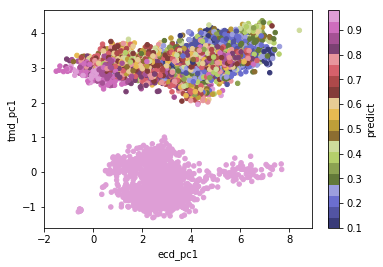

In [32]:
ax = plt.subplot()
dataset.plot(kind='scatter',x='ecd_pc1',y='tmd_pc1',c='predict',colormap='Vega20b',ax=ax)

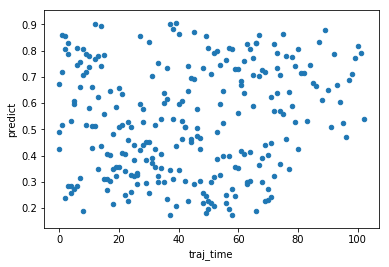

In [33]:
dataset[dataset['system'] == 0].plot(kind='scatter', x='traj_time',y='predict')

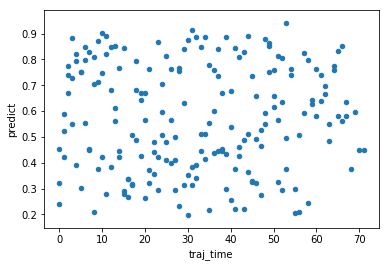

In [34]:
dataset[dataset['system'] == 1].plot(kind='scatter', x='traj_time',y='predict')

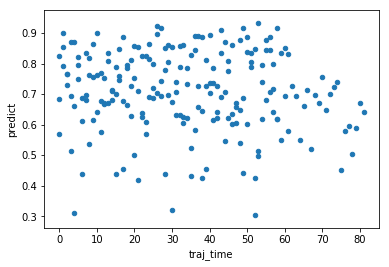

In [35]:
dataset[dataset['system'] == 2].plot(kind='scatter', x='traj_time',y='predict')

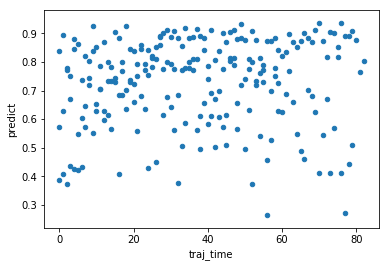

In [36]:
dataset[dataset['system'] == 3].plot(kind='scatter', x='traj_time',y='predict')

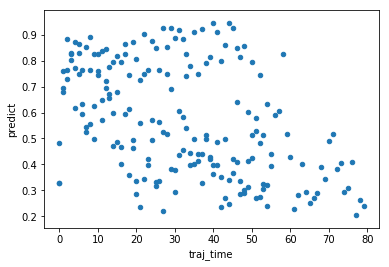

In [37]:
dataset[dataset['system'] == 4].plot(kind='scatter', x='traj_time',y='predict')

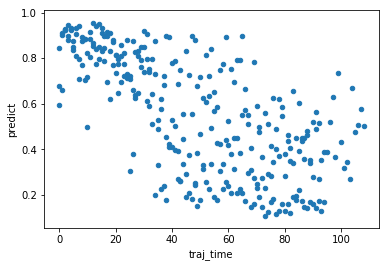

In [38]:
dataset[dataset['system'] == 5].plot(kind='scatter', x='traj_time',y='predict')

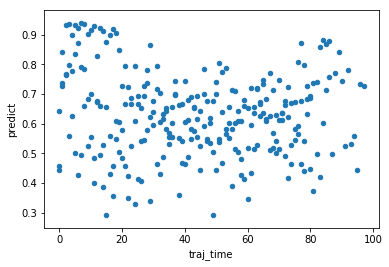

In [39]:
dataset[dataset['system'] == 6].plot(kind='scatter', x='traj_time',y='predict')

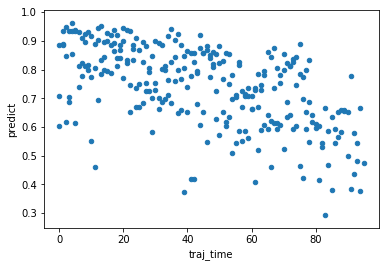

In [40]:
dataset[dataset['system'] == 7].plot(kind='scatter', x='traj_time',y='predict')

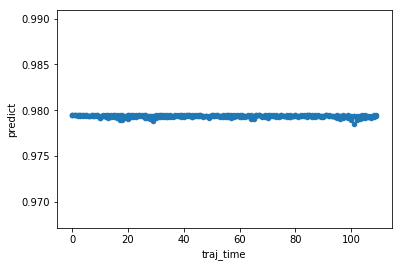

In [41]:
dataset[dataset['system'] == 8].plot(kind='scatter', x='traj_time',y='predict')

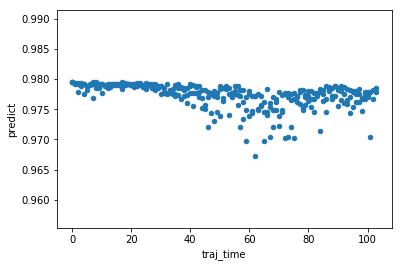

In [42]:
dataset[dataset['system'] == 9].plot(kind='scatter', x='traj_time',y='predict')

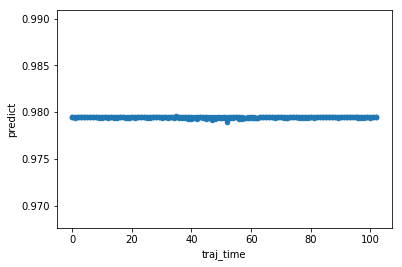

In [43]:
dataset[dataset['system'] == 10].plot(kind='scatter', x='traj_time',y='predict')

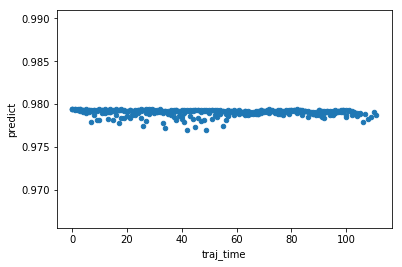

In [44]:
dataset[dataset['system'] == 11].plot(kind='scatter', x='traj_time',y='predict')

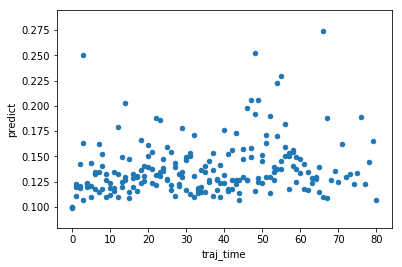

In [45]:
dataset[dataset['system'] == 12].plot(kind='scatter', x='traj_time',y='predict')

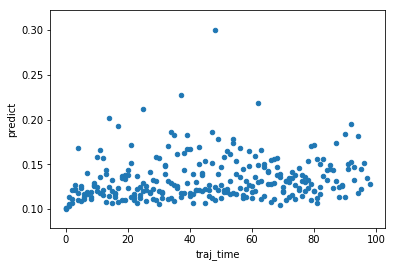

In [46]:
dataset[dataset['system'] == 13].plot(kind='scatter', x='traj_time',y='predict')

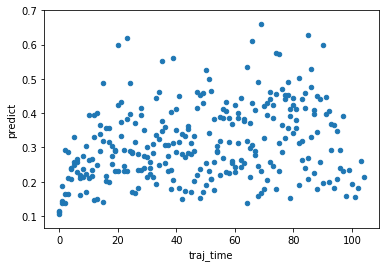

In [47]:
dataset[dataset['system'] == 14].plot(kind='scatter', x='traj_time',y='predict')

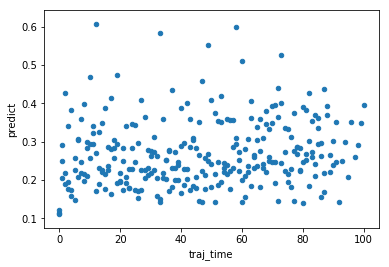

In [48]:
dataset[dataset['system'] == 15].plot(kind='scatter', x='traj_time',y='predict')

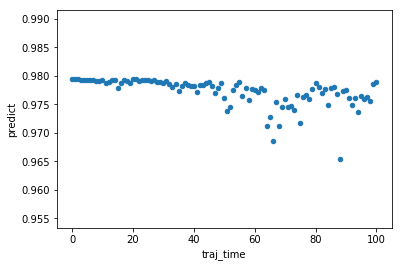

In [49]:
dataset[dataset['system'] == 16].plot(kind='scatter', x='traj_time',y='predict')

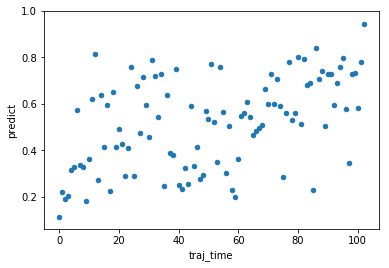

In [50]:
dataset[dataset['system'] == 17].plot(kind='scatter', x='traj_time',y='predict')

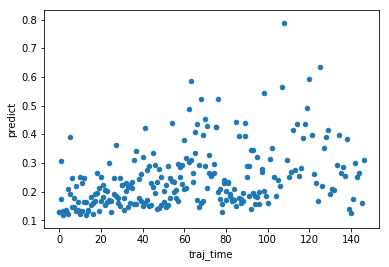

In [51]:
dataset[dataset['system'] == 18].plot(kind='scatter', x='traj_time',y='predict')

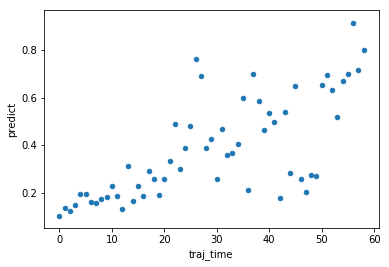

In [52]:
dataset[dataset['system'] == 19].plot(kind='scatter', x='traj_time',y='predict')

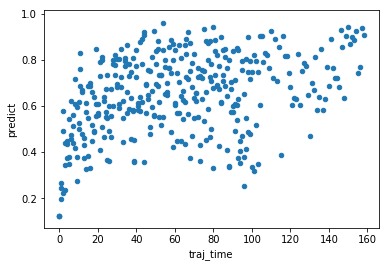

In [53]:
dataset[dataset['system'] == 20].plot(kind='scatter', x='traj_time',y='predict')